In [84]:
import pandas as pd
import geopandas as gpd

In [85]:
df = pd.read_csv("../../data/da_travis_co_results.csv")

In [86]:
pcts = gpd.read_file("../../data/precincts_march24.geojson")

In [87]:
pcts["Precinct"] = pcts["Precinct"].astype(int)
df["Precinct"] = df["Precinct"].astype(int)

In [88]:
pcts = pcts.merge(df, on="Precinct", how="left")

In [89]:
from pygris.utils import erase_water

In [90]:
pcts["pct_garza"] = pcts["JG - Total Votes"]/(pcts["JG - Total Votes"] + pcts["JS - Total Votes"])

In [91]:
df = pd.read_csv("../../data/pres_dem_travis_co_results.csv")

In [92]:
df["Precinct"] = df["Precinct"].dropna()
df["Precinct"] = df["Precinct"].astype(int)

In [93]:
pcts = pcts.merge(df, on="Precinct", how="left")

In [94]:
pcts["pct_biden"] = pcts["Biden Total Votes"]/(pcts["Total_y"])

In [95]:
pcts = erase_water(pcts)

In [96]:
import matplotlib.pyplot as plt

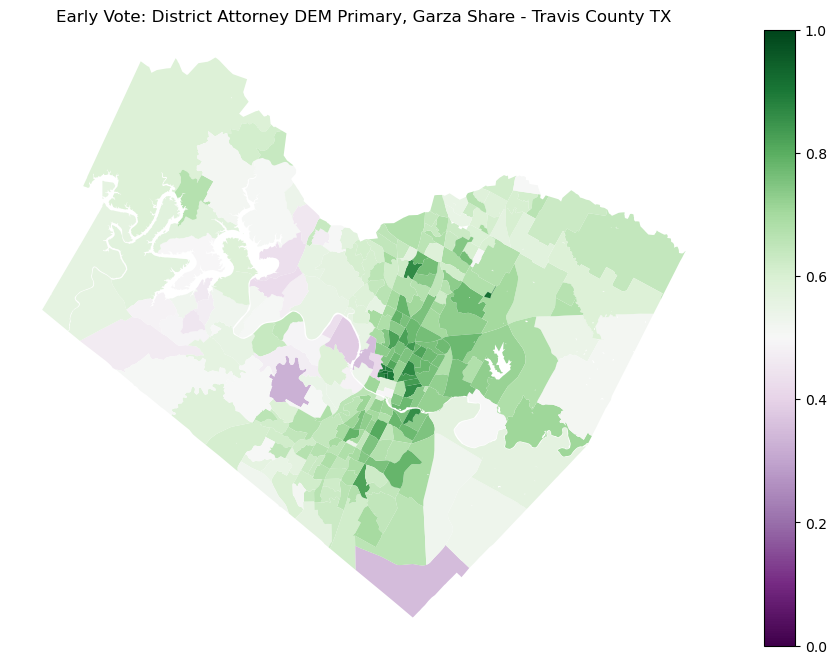

In [97]:
ax = pcts.plot(column="pct_garza", cmap="PRGn", legend=True, figsize=(12, 8), legend_kwds={"fmt":".0%"}, vmin=0, vmax=1 )
ax.set_axis_off()
ax.set_title("Early Vote: District Attorney DEM Primary, Garza Share - Travis County TX")
plt.savefig("garza_results.png", dpi=800)

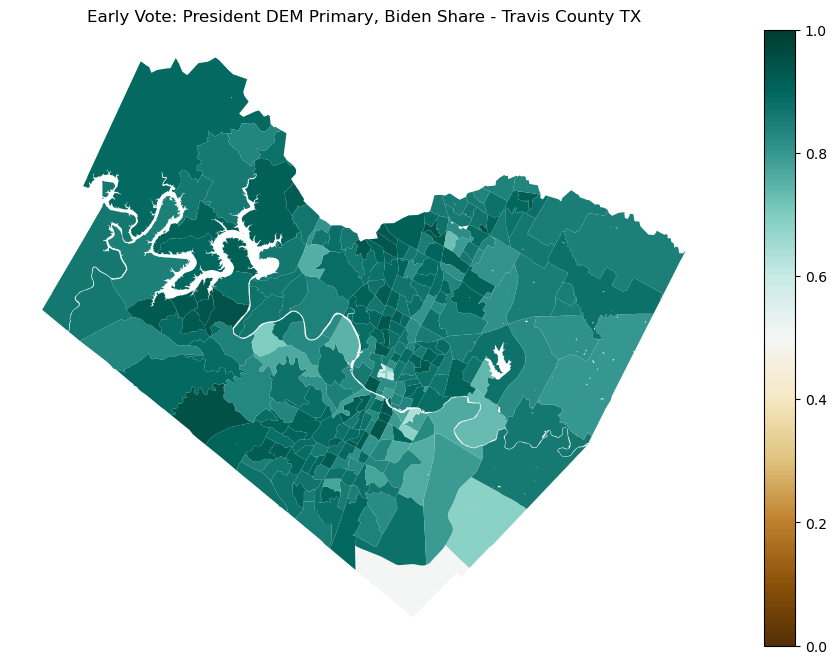

In [98]:
ax = pcts.plot(column="pct_biden", cmap="BrBG", legend=True, figsize=(12, 8), legend_kwds={"fmt":".0%"}, vmin=0, vmax=1 )
ax.set_axis_off()
ax.set_title("Early Vote: President DEM Primary, Biden Share - Travis County TX")
plt.savefig("biden_results.png", dpi=800)

In [99]:
df = pd.read_csv("../../data/presidental_primary_results.csv")
df = df[df["County"] == 453]

In [100]:
df["Precinct"] = df["Precinct"].dropna()
df["Precinct"] = df["Precinct"].astype(int)

In [101]:
pcts = gpd.read_file("../../data/precincts_march24.geojson")
pcts = erase_water(pcts)
pcts["Precinct"] = pcts["Precinct"].astype(int)
pcts = pcts.merge(df, on="Precinct", how="left")

In [102]:
pcts["pct_trump"] = pcts["Trump"]/pcts["Total REP"]

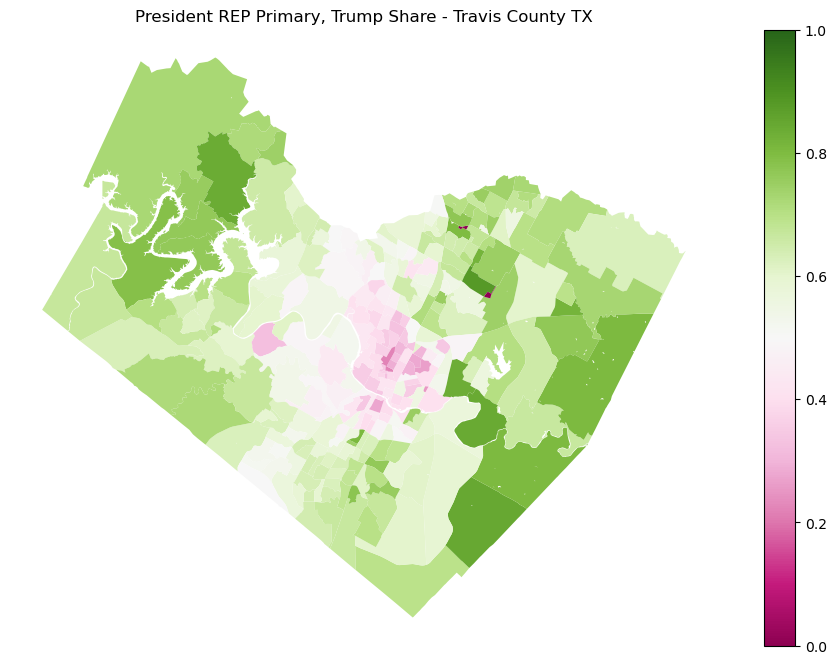

In [103]:
ax = pcts.plot(column="pct_trump", cmap="PiYG", legend=True, figsize=(12, 8), legend_kwds={"fmt":".0%"}, vmin=0, vmax=1 )
ax.set_axis_off()
ax.set_title("President REP Primary, Trump Share - Travis County TX")
plt.savefig("trump_results.png", dpi=800)

In [104]:
pcts["total_biden_pct"] = pcts["Biden"]/(pcts["Total REP"]+pcts["Total DEM"])
pcts["total_trump_pct"] = pcts["Trump"]/(pcts["Total REP"]+pcts["Total DEM"])
pcts["total_haley_pct"] = pcts["Haley"]/(pcts["Total REP"]+pcts["Total DEM"])
pcts["total_non_bt"] = 1 - (pcts["total_biden_pct"] + pcts["total_trump_pct"])

In [105]:
other = pcts[(pcts["total_non_bt"] > pcts["total_biden_pct"]) & (pcts["total_non_bt"] > pcts["total_trump_pct"])]
biden = pcts[(pcts["total_biden_pct"] > pcts["total_non_bt"]) & (pcts["total_biden_pct"] > pcts["total_trump_pct"])]
trump = pcts[(pcts["total_trump_pct"] > pcts["total_non_bt"]) & (pcts["total_trump_pct"] > pcts["total_biden_pct"])]
print(len(other) + len(biden) + len(trump))

285


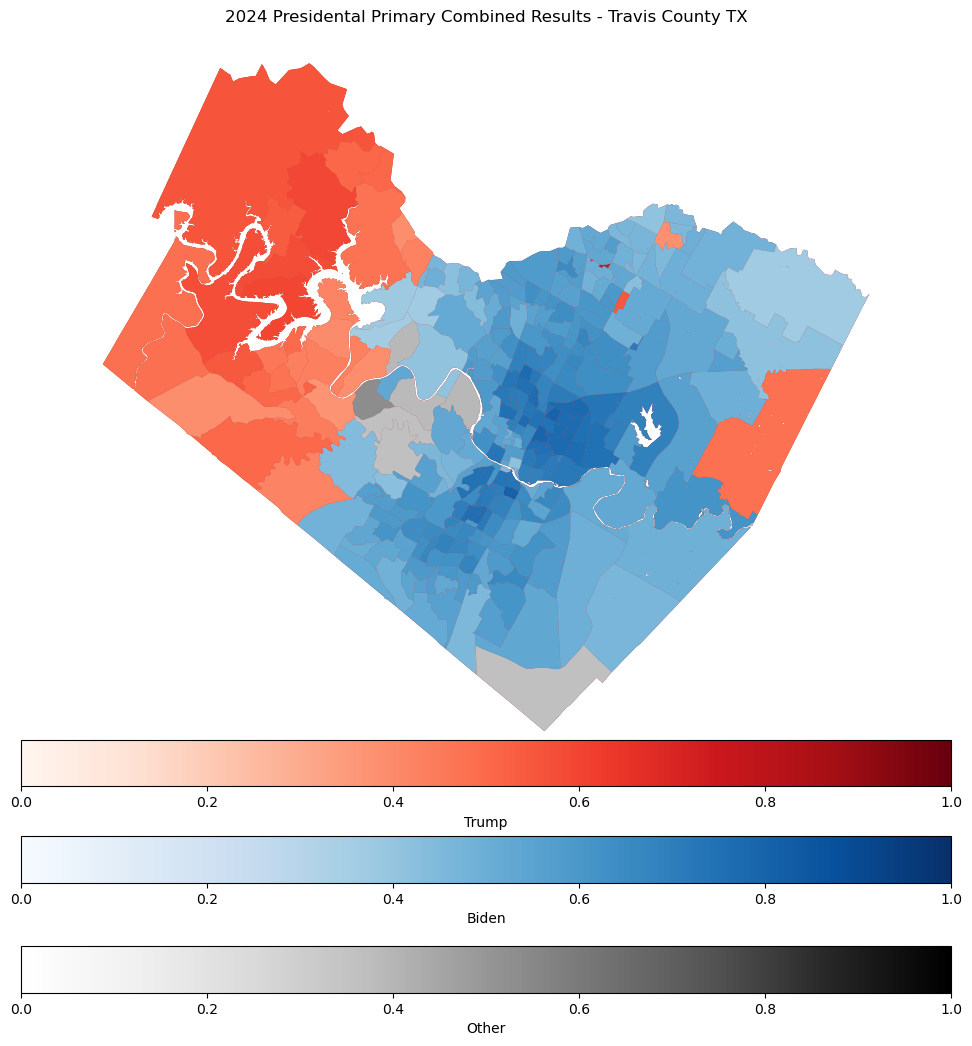

In [106]:
ax = pcts.plot(column=None,color="Brown", figsize=(12, 14), legend_kwds={"fmt":".0%"}, vmin=0, vmax=1, linewidth=0)
other.plot(ax=ax, column="total_non_bt", cmap="Greys", legend=True, vmin=0, vmax=1, legend_kwds={"label":"Other", "orientation": "horizontal", "pad":-0.03, 'fmt': "{:.0%}"})
biden.plot(ax=ax, column="total_biden_pct", cmap="Blues", legend=True, vmin=0, vmax=1, legend_kwds={"label":"Biden", "orientation": "horizontal", "pad":-0.03, 'fmt': "{:.0%}"})
trump.plot(ax=ax, column="total_trump_pct", cmap="Reds", legend=True, vmin=0, vmax=1, legend_kwds={"label":"Trump", "orientation": "horizontal", "pad":-0.03, 'fmt': "{:.0%}"})
ax.set_axis_off()
ax.set_title("2024 Presidental Primary Combined Results - Travis County TX")
plt.savefig("combined_results.png", dpi=800)

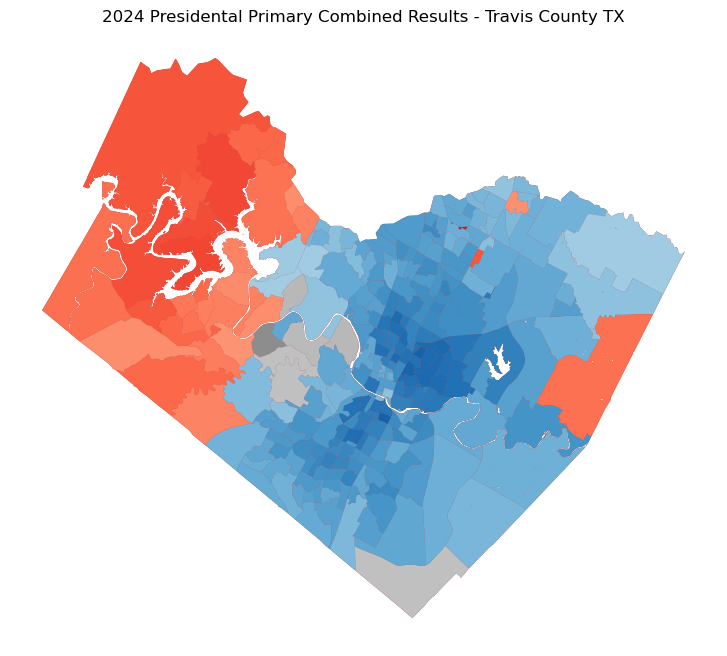

In [107]:
ax = pcts.plot(column=None,color="Brown", figsize=(12, 8), legend_kwds={"fmt":".0%"}, vmin=0, vmax=1, linewidth=0)
other.plot(ax=ax, column="total_non_bt", cmap="Greys", legend=False, vmin=0, vmax=1, legend_kwds={"label":"Other", "orientation": "horizontal", "pad":-0.03, 'fmt': "{:.0%}"})
biden.plot(ax=ax, column="total_biden_pct", cmap="Blues", legend=False, vmin=0, vmax=1, legend_kwds={"label":"Biden", "orientation": "horizontal", "pad":-0.03, 'fmt': "{:.0%}"})
trump.plot(ax=ax, column="total_trump_pct", cmap="Reds", legend=False, vmin=0, vmax=1, legend_kwds={"label":"Trump", "orientation": "horizontal", "pad":-0.03, 'fmt': "{:.0%}"})
ax.set_axis_off()
ax.set_title("2024 Presidental Primary Combined Results - Travis County TX")
plt.savefig("combined_results_no_legend.png", dpi=800)